### The Data Analysis Process

 This Process is Divided in to 5 major parts:--
 <li> Asking the right question.
 <li> Data Pre-prossing.
 <li> Exploratory data analysis.
 <li> Drawing Conclution.
 <li> Communicating Results.

In [1]:
# Importing all the required librarys.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm
from datetime import date
from datetime import time
from datetime import datetime
from wordcloud import WordCloud

In [2]:
# Read the data from the .csv file

data = pd.read_csv("startup_funding.csv")

In [3]:
data.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01-08-17,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02-08-17,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02-08-17,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02-08-17,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02-08-17,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


### 1.Asking the right question.

After having a Rough Idea about The data Set, Some of the questions that i can ask from the dataset are:-
<li> What is the relation between Funding ecosystem and time?
<li> What are roles of citys in funding?
<li> What are the top favored Industry for funding?
<li> Who are the major investors?
<li> Average amount that a startup get in india city wise?
<li> Relation between city and industry!

### 2.Data Pre-prossing.

This step is also known as "Data Wrangling or Data Munging". This Step can also be divided into three major part as :-
<li> Gathering The Data.
<li> Asscessing The Data.
<li> Cleaning The Data.

### 2.1.Gathering The Data.

Here this process is not that much important as our data is present in the from of .csv file.

### 2.2.Assessing The Data.

This step is bassically having a overview of the data using basic finctions as below:- 

In [4]:
data.head(5)

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01-08-17,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02-08-17,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02-08-17,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02-08-17,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02-08-17,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


In [5]:
data.shape

(2372, 10)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2372 entries, 0 to 2371
Data columns (total 10 columns):
SNo                 2372 non-null int64
Date                2372 non-null object
StartupName         2372 non-null object
IndustryVertical    2201 non-null object
SubVertical         1436 non-null object
CityLocation        2193 non-null object
InvestorsName       2364 non-null object
InvestmentType      2371 non-null object
AmountInUSD         1525 non-null object
Remarks             419 non-null object
dtypes: int64(1), object(9)
memory usage: 185.4+ KB


In [7]:
data.nunique()

SNo                 2372
Date                 698
StartupName         2001
IndustryVertical     743
SubVertical         1364
CityLocation          71
InvestorsName       1885
InvestmentType         7
AmountInUSD          328
Remarks               69
dtype: int64

In [8]:
for index in data.columns:
    print("data[\"",index,"\"].describe()")
    print(data[index].describe())
    print("\n\n\n\n")


data[" SNo "].describe()
count    2372.000000
mean     1185.500000
std       684.881742
min         0.000000
25%       592.750000
50%      1185.500000
75%      1778.250000
max      2371.000000
Name: SNo, dtype: float64





data[" Date "].describe()
count         2372
unique         698
top       30-11-16
freq            11
Name: Date, dtype: object





data[" StartupName "].describe()
count       2372
unique      2001
top       Swiggy
freq           7
Name: StartupName, dtype: object





data[" IndustryVertical "].describe()
count                  2201
unique                  743
top       Consumer Internet
freq                    772
Name: IndustryVertical, dtype: object





data[" SubVertical "].describe()
count                1436
unique               1364
top       Online Pharmacy
freq                    9
Name: SubVertical, dtype: object





data[" CityLocation "].describe()
count          2193
unique           71
top       Bangalore
freq            627
Name: CityLocation, dt

In [9]:
data.columns

Index(['SNo', 'Date', 'StartupName', 'IndustryVertical', 'SubVertical',
       'CityLocation', 'InvestorsName', 'InvestmentType', 'AmountInUSD',
       'Remarks'],
      dtype='object')

### 2.3.Cleaning The Data.

In [10]:
# Convert the Date into usable column
date_in_good_format = []
bul = []
for date in data["Date"]:
    try:
        date_in_good_format.append(datetime.strptime(date,"%d-%m-%y").date())
        bul.append(True)
    except:
        date_in_good_format.append(date)
        bul.append(False)
    
data = data[bul]
date_in_good_format = []

for date in data["Date"]:
    date_in_good_format.append(datetime.strptime(date,"%d-%m-%y").date())

data["Date"] = date_in_good_format

In [11]:
# Convert the AmountInUSD into usable column
actual_amount = []
for amount in data["AmountInUSD"]:
    try:
        actual_amount.append(round(int(amount.replace(",",""))))
    except:
        actual_amount.append(amount)

data["AmountInUSD"] = actual_amount

In [12]:
print("% of null data in remark column = ",round((data["Remarks"].isnull().sum())/(data["Remarks"].isnull().count()),2)*100,"%")

% of null data in remark column =  82.0 %


So we will remove the remark column.

In [13]:
del data["Remarks"]

### <u>3. Exploratory data analysis.(EDA)

This is the process Where we plot different types of graphs and explore the data to find the answers to our questions.

Now the first question was <br>
<h4><b><u>1.What is the relation between Funding ecosystem and time?<br></b></u></h4>
well,the answer can be given by a graph given below

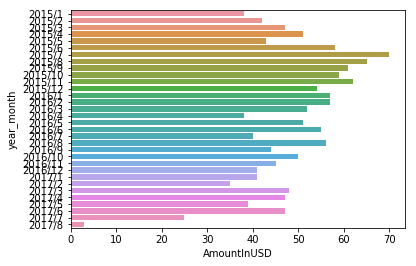

In [14]:
month = []
year = []
month_year = []
for date in data["Date"]:
    month_year.append(date)
    month.append(date.month)
    year.append(date.year)
    
new_data = data

new_data["Month"] = month
new_data["year"] = year

new_df = new_data.groupby(["year","Month"])["AmountInUSD"].count().reset_index()
year_month = []
for i in range(new_df["year"].count()):
    year_month.append(str(new_df["year"][i])+ "/" +str(new_df["Month"][i]))
new_df["year_month"] = year_month
x = new_df["year_month"]
y = new_df["AmountInUSD"]

sns.barplot(y,x)


<h4><b><u>2.How is startups distributed all over india??<br></b></u></h4>

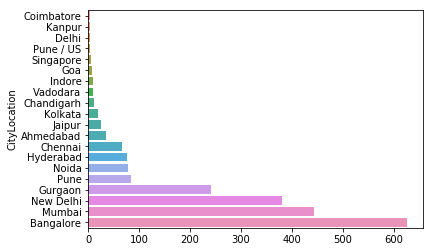

In [15]:
x = data.groupby("CityLocation")["SNo"].count().sort_values().index[-20:]
y = data.groupby("CityLocation")["SNo"].count().sort_values().values[-20:]
sns.barplot(y,x)

Now the Second question was <br>
<h4><b><u>2.What are roles of citys in funding?<br></b></u></h4>
well,the answer can be given by a graph given below

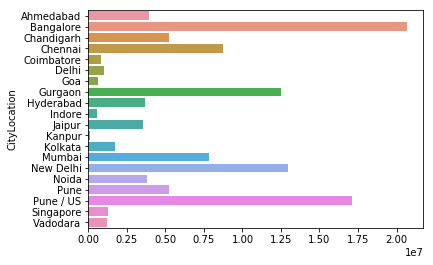

In [16]:
new_data = data
city = new_data["CityLocation"].value_counts()[0:20].index
bul = []
for i in new_data["CityLocation"]:
    bul.append(i in city)

new_data = new_data[bul]
sns.barplot(new_data.groupby("CityLocation")["AmountInUSD"].mean().values,new_data.groupby("CityLocation")["AmountInUSD"].mean().index)

In [17]:
print("The maximum amount invested is ",data["AmountInUSD"].max(),"And the details are:")
data[data["AmountInUSD"] == data["AmountInUSD"].max()]

The maximum amount invested is  1400000000.0 And the details are:


,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Month,year
158,158,2017-05-18,Paytm,ECommerce,Mobile Wallet & ECommerce platform,Bangalore,SoftBank Group,Private Equity,1.400000e+09,5,2017
294,294,2017-03-21,Flipkart,eCommerce,ECommerce Marketplace,Bangalore,"Microsoft, eBay, Tencent Holdings",Private Equity,1.400000e+09,3,2017


Now the Third question was <br>
<h4><b><u>2.Who are the top favored industry for funding?<br></b></u></h4>
well,the answer can be given by a graph given below

In [18]:
data["IndustryVertical"].value_counts()[0:10]

Consumer Internet    772
Technology           313
eCommerce            171
ECommerce             53
Healthcare            30
Logistics             24
Education             20
Food & Beverage       19
Finance                9
Others                 6
Name: IndustryVertical, dtype: int64

Average funding in ECommerce Sector is 57324925.0


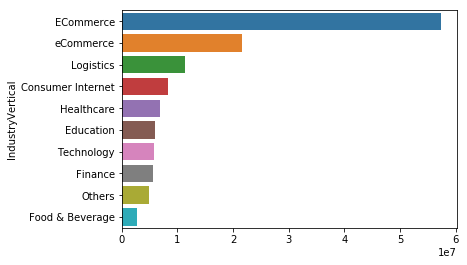

In [19]:
bul = []
for i in data["IndustryVertical"]:
    bul.append(i in data["IndustryVertical"].value_counts()[0:10].index)
    
new_df = data[bul]
x = new_df.groupby("IndustryVertical")["AmountInUSD"].mean().sort_values(ascending=False).values
y = new_df.groupby("IndustryVertical")["AmountInUSD"].mean().sort_values(ascending=False).index
sns.barplot(x,y)
print( "Average funding in",y[0],"Sector is",float(round(x[0])))

Now the Forth question was <br>
<h4><b><u>2.Who are the investors?<br></b></u></h4>
well,the answer can be given by a graph given below

100%|██████████████████████████████████████████████████████████████████████████| 2367/2367 [00:00<00:00, 148312.91it/s]


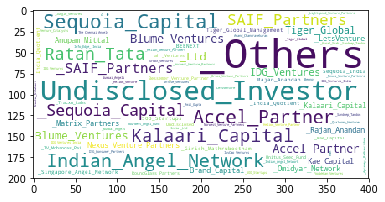

In [20]:
text = ''
for i in tqdm(data["InvestorsName"]):
    text = text + " " + str(i).replace(" ","_")
cloud = WordCloud(background_color="white").generate(text)
plt.imshow(cloud)
plt.show()

Now the Third question was <br>
<h4><b><u>2.What are the types of funding in India?<br></b></u></h4>
well,the answer can be given by a graph given below

In [21]:
data["InvestmentType"].value_counts()

Seed Funding      1266
Private Equity    1066
SeedFunding         30
Crowd funding        1
Debt Funding         1
Crowd Funding        1
PrivateEquity        1
Name: InvestmentType, dtype: int64

In [22]:
InvestmentType = []
for i in data["InvestmentType"]:
    if str(i) == "SeedFunding":
        InvestmentType.append("Seed Funding")
    else:
        InvestmentType.append(str(i))
        
data["InvestmentType"] = InvestmentType

In [23]:
data["InvestmentType"].value_counts()

Seed Funding      1296
Private Equity    1066
Crowd funding        1
Debt Funding         1
nan                  1
Crowd Funding        1
PrivateEquity        1
Name: InvestmentType, dtype: int64

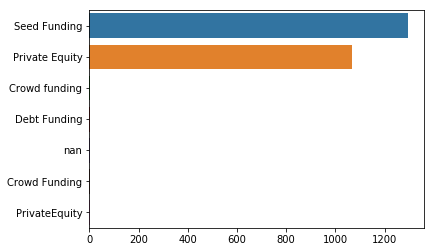

In [24]:
sns.barplot(data["InvestmentType"].value_counts().values,data["InvestmentType"].value_counts().index)

In [27]:
print(datetime.now())

2019-08-19 11:21:35.236722


## By : - MD SHAKIB MONDAL
<BR> Email :- sakimondal7@gmail.com